# Problem 2: Student Performance


In [11]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import os

## Data Ingestion

In [12]:
fname = 'Students_Performance_Data.csv'
df = pd.read_csv(fname)
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


## Data Preprocessing


In [13]:
# describe the data
n_rows, n_cols = df.shape
print(f"Shape: {n_rows} rows and {n_cols} columns")

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numeric columns ({len(num_cols)}): {num_cols}")

cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print(f"Categorical columns ({len(cat_cols)}): {cat_cols}")

Shape: 1000 rows and 8 columns
Numeric columns (3): ['math score', 'reading score', 'writing score']
Categorical columns (5): ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [14]:
# check for missing values
na = df.isna()
col_na = na.sum()
print(f"Number of Missing Cells: {int(col_na.sum())}")

Number of Missing Cells: 0


### No missing records - proceed with visualization.


## V1: Gender boxplots (math vs reading)

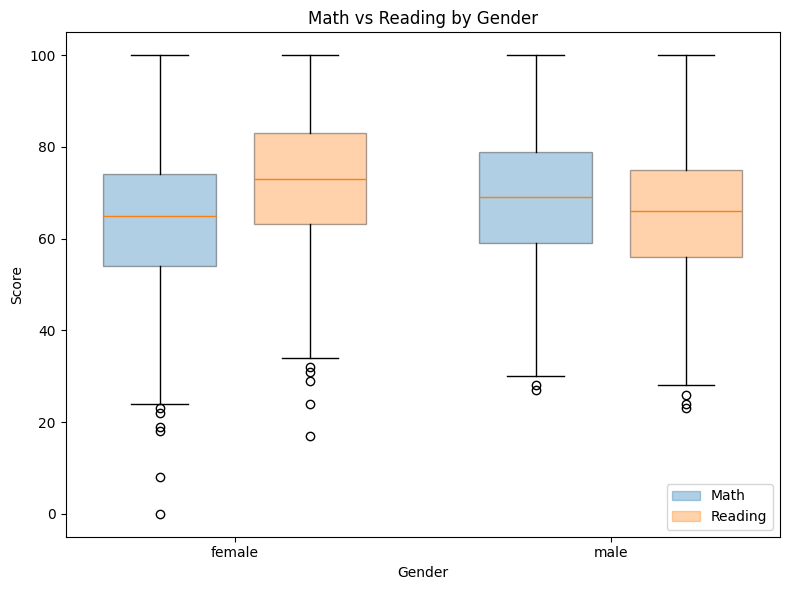

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))
order = [g for g in ['female','male'] if g in df['gender'].unique()] or sorted(df['gender'].unique())

math  = [df.loc[df['gender']==g, 'math score'].dropna().to_numpy(dtype=float)    for g in order]
read  = [df.loc[df['gender']==g, 'reading score'].dropna().to_numpy(dtype=float) for g in order]
pos   = np.arange(len(order))*2.0

bp1 = ax.boxplot(math, positions=pos,     widths=0.6, patch_artist=True)
bp2 = ax.boxplot(read, positions=pos+0.8, widths=0.6, patch_artist=True)

for b in bp1['boxes']: b.set_facecolor('tab:blue');   b.set_alpha(0.35)
for b in bp2['boxes']: b.set_facecolor('tab:orange'); b.set_alpha(0.35)

ax.set(title='Math vs Reading by Gender', xlabel='Gender', ylabel='Score')
ax.set_xticks(pos+0.4); ax.set_xticklabels(order); ax.tick_params(labelsize=10)
ax.legend([mpatches.Patch(color='tab:blue', alpha=0.35),
           mpatches.Patch(color='tab:orange', alpha=0.35)],
          ['Math','Reading'])

plt.tight_layout()
orig_w, orig_h = map(float, fig.get_size_inches())
fig.set_size_inches(800/300, 600/300)
fig.savefig('V1.png', dpi=300)
fig.set_size_inches(orig_w, orig_h)
plt.show()

## V2: Test prep impact on math

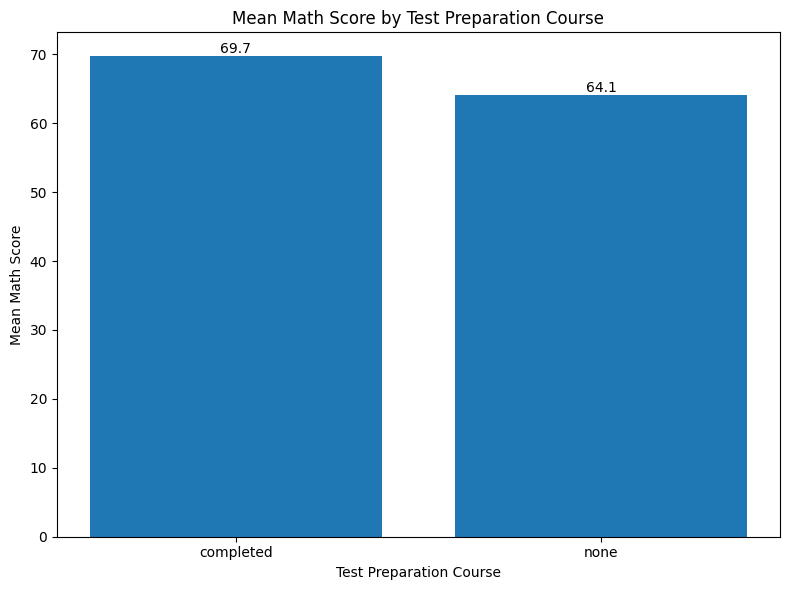

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))
order = [g for g in ['completed','none'] if g in df['test preparation course'].unique()]
means = (df.groupby('test preparation course')['math score'].mean()).reindex(order)
x = np.arange(len(means)); y = means.to_numpy(dtype=float)

ax.bar(x, y)
ax.set_xticks(x); ax.set_xticklabels(means.index)
ax.set(title='Mean Math Score by Test Preparation Course',
       xlabel='Test Preparation Course', ylabel='Mean Math Score')
for i, v in enumerate(y): ax.text(i, v, f'{v:.1f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
orig_w, orig_h = map(float, fig.get_size_inches())
fig.set_size_inches(800/300, 600/300)
fig.savefig('V2.png', dpi=300)
fig.set_size_inches(orig_w, orig_h)
plt.show()

## V3: Lunch type and average performance


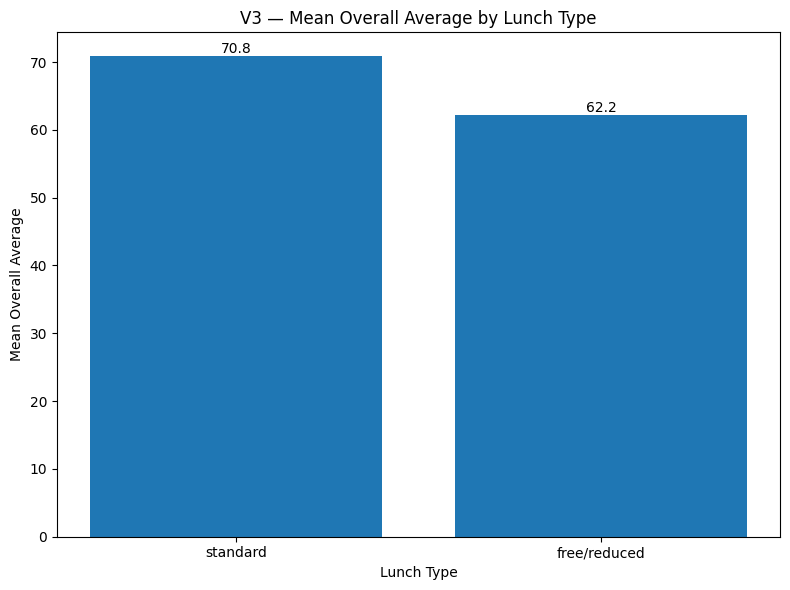

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))
tmp = df[['lunch','math score','reading score','writing score']].copy()
tmp['overall_avg'] = tmp[['math score','reading score','writing score']].mean(axis=1)

order = [g for g in ['standard','free/reduced'] if g in tmp['lunch'].unique()]
means = tmp.groupby('lunch')['overall_avg'].mean().reindex(order)

x = np.arange(len(means)); y = means.to_numpy(dtype=float)
ax.bar(x, y)
ax.set_xticks(x); ax.set_xticklabels(means.index)
ax.set(title='V3 — Mean Overall Average by Lunch Type',
       xlabel='Lunch Type', ylabel='Mean Overall Average')
for i, v in enumerate(y): ax.text(i, v, f'{v:.1f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
orig_w, orig_h = map(float, fig.get_size_inches())
fig.set_size_inches(800/300, 600/300)
fig.savefig('V3_1.png', dpi=300)
fig.set_size_inches(orig_w, orig_h)
plt.show()

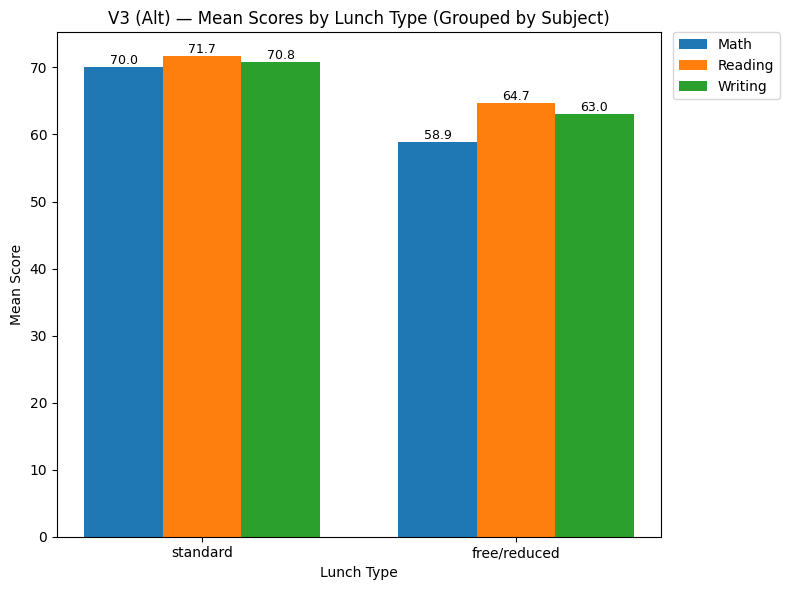

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))
subjects = ['math score','reading score','writing score']
order = [g for g in ['standard','free/reduced'] if g in df['lunch'].unique()]

means_by_lunch = (df.groupby('lunch')[subjects].mean()).reindex(order)

x = np.arange(len(means_by_lunch.index))
w = 0.25
labels = ['Math','Reading','Writing']
for i, subj in enumerate(subjects):
    vals = means_by_lunch[subj].to_numpy(dtype=float)
    ax.bar(x + (i-1)*w, vals, w, label=labels[i])
    for j, v in enumerate(vals):
        ax.text(x[j] + (i-1)*w, v, f'{v:.1f}', ha='center', va='bottom', fontsize=9)

ax.set_xticks(x); ax.set_xticklabels(means_by_lunch.index)
ax.set(title='V3 (Alt) — Mean Scores by Lunch Type (Grouped by Subject)',
       xlabel='Lunch Type', ylabel='Mean Score')
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0.)
ax.tick_params(labelsize=10)

plt.tight_layout()
orig_w, orig_h = map(float, fig.get_size_inches())
fig.set_size_inches(800/300, 600/300)
fig.savefig('V3_2.png', dpi=300)
fig.set_size_inches(orig_w, orig_h)
plt.show()

## V4: Subject correlations


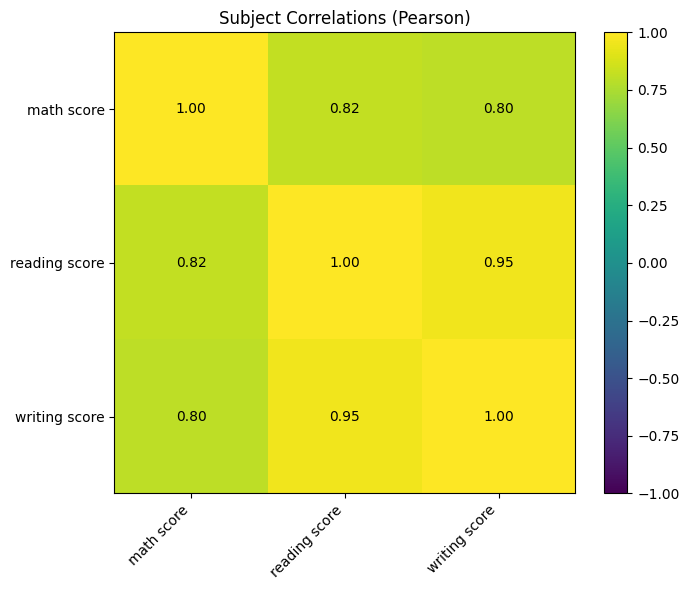

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))
sub = df[['math score','reading score','writing score']]
corr = sub.corr()

im = ax.imshow(corr.values, vmin=-1, vmax=1)
ax.set_xticks(range(3)); ax.set_yticks(range(3))
ax.set_xticklabels(sub.columns, rotation=45, ha='right'); ax.set_yticklabels(sub.columns)
ax.set_title('Subject Correlations (Pearson)')
for i in range(3):
    for j in range(3):
        ax.text(j, i, f'{corr.values[i,j]:.2f}', ha='center', va='center', fontsize=10)
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

plt.tight_layout()
orig_w, orig_h = map(float, fig.get_size_inches())
fig.set_size_inches(800/300, 600/300)
fig.savefig('V4.png', dpi=300)
fig.set_size_inches(orig_w, orig_h)
plt.show()

## V5: Math vs reading with trend lines by test prep

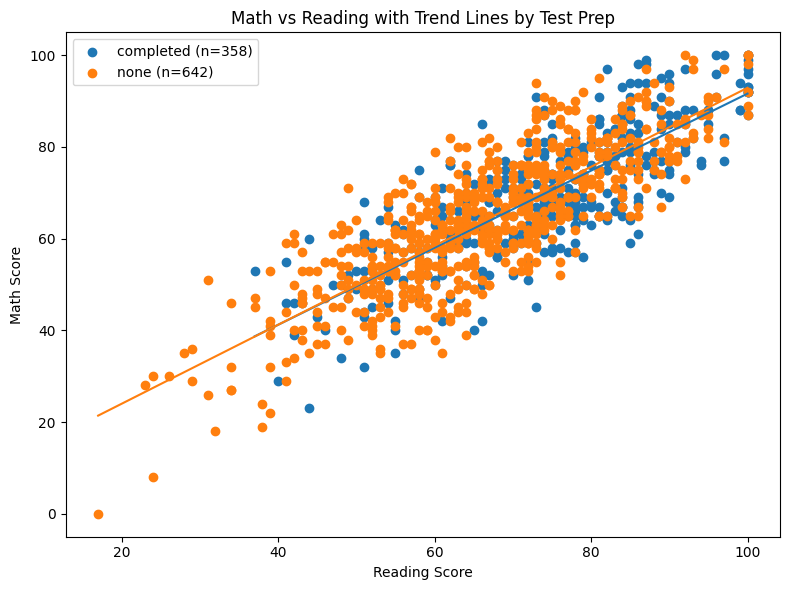

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))
order = [g for g in ['completed','none'] if g in df['test preparation course'].unique()]

for g in order:
    subg = df[df['test preparation course']==g]
    x = subg['reading score'].to_numpy(dtype=float)
    y = subg['math score'].to_numpy(dtype=float)
    ax.scatter(x, y, label=f'{g} (n={len(subg)})')
    if len(subg) >= 2:
        a, b = np.polyfit(x, y, 1)
        xx = np.linspace(x.min(), x.max(), 100)
        ax.plot(xx, a*xx + b)

ax.set(title='Math vs Reading with Trend Lines by Test Prep',
       xlabel='Reading Score', ylabel='Math Score')
ax.legend(); ax.tick_params(labelsize=10)

plt.tight_layout()
orig_w, orig_h = map(float, fig.get_size_inches())
fig.set_size_inches(800/300, 600/300)
fig.savefig('V5.png', dpi=300)
fig.set_size_inches(orig_w, orig_h)
plt.show()